<b> Nayab Akhtar</b>

<b>GRIP Internship</b>

<b>Task # 1</b>

Predict the percentage of an student based on the no. of study hours.

● This is a simple linear regression task as it involves just 2 variables.

● You can use R, Python, SAS Enterprise Miner or any other tool

What will be predicted score if a student studies for 9.25 hrs/ day?

<b> Importing libraries</b>

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

<b>Loading Data</b>

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print(" Import successfull")
data.head(15)

 Import successfull


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#To print the shape of Data Frame
print(data.shape)
#To print the  data type of Data Frame in Data set
print(data.dtypes)

(25, 2)
Hours     float64
Scores      int64
dtype: object


In [4]:
#To Describe Data set
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<b> Visualling the Dataset</b>

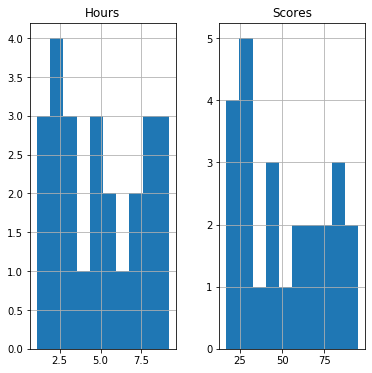

In [5]:
#For plotting Histogram for all variables
data.hist(figsize = (6, 6))
plt.show()

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

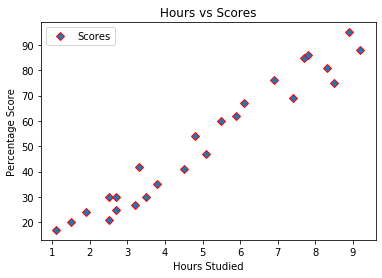

In [7]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='s',marker='D',markeredgecolor='red')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.title('Hours vs Scores')  
plt.show()

In [8]:
#correlation 
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<b> Preparing Data</b>

In [9]:
x= data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

<b> Splitting the Dataset </b>

In [10]:
#Training 80%
#Testing 30%
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y,  test_size=0.2, random_state=0)

<b> Training the Model</b>

In [11]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<b>Visualising the training  result</b>

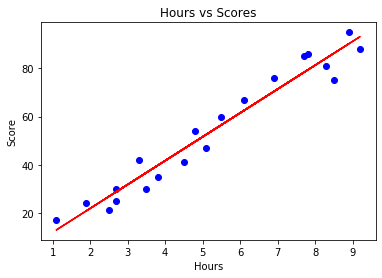

In [12]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [13]:
# Testing data
print(X_test) 
# Predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


<b> Visualising the test result</b>

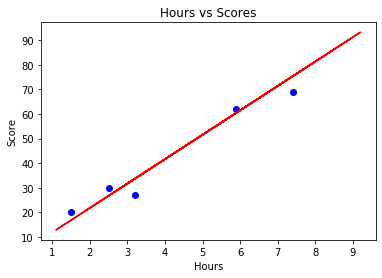

In [14]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

<b>Train  vs Test</b>

In [15]:
data = pd.DataFrame({'Train': y_test, 'Test': y_pred})  
data

,Train,Test
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [16]:
# Testing the model for 9.25 Hours
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


<b>Accuracy of Model</b>

In [18]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356